In [1]:
!pip install pyspark==2.4.5

     |████████████████████████████████| 217.8MB 185kB/s  eta 0:00:01
     |████████████████████████████████| 204kB 44.5MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [2]:
!pip install https://github.com/IBM/coursera/blob/master/systemml-1.3.0-SNAPSHOT-python.tar.gz?raw=true

     |████████████████████████████████| 9.9MB 6.6MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/aa/bf/28/4344dd13abd8b9b6cbd4032baf4b851873d2e2288a65631fd2
Successfully built systemml


In [3]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, StringType
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[1]"))
from pyspark.sql import SparkSession

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d8b1467a452e4577a0cffa4973c5aa53 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yTJQ2G5fWEH-JBVtjS3O_o2dHjEDLhmqiiaftYWnC_u-',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_d8b1467a452e4577a0cffa4973c5aa53.get_object(Bucket='hd-donotdelete-pr-ybeei0hlre0ooz',Key='cardio_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body, sep = ';')
df_data_1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#### Looking for missing values

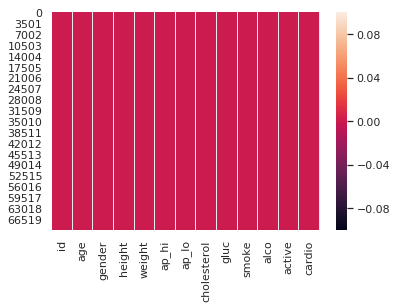

In [25]:
sns.heatmap(df_data_1.isnull())

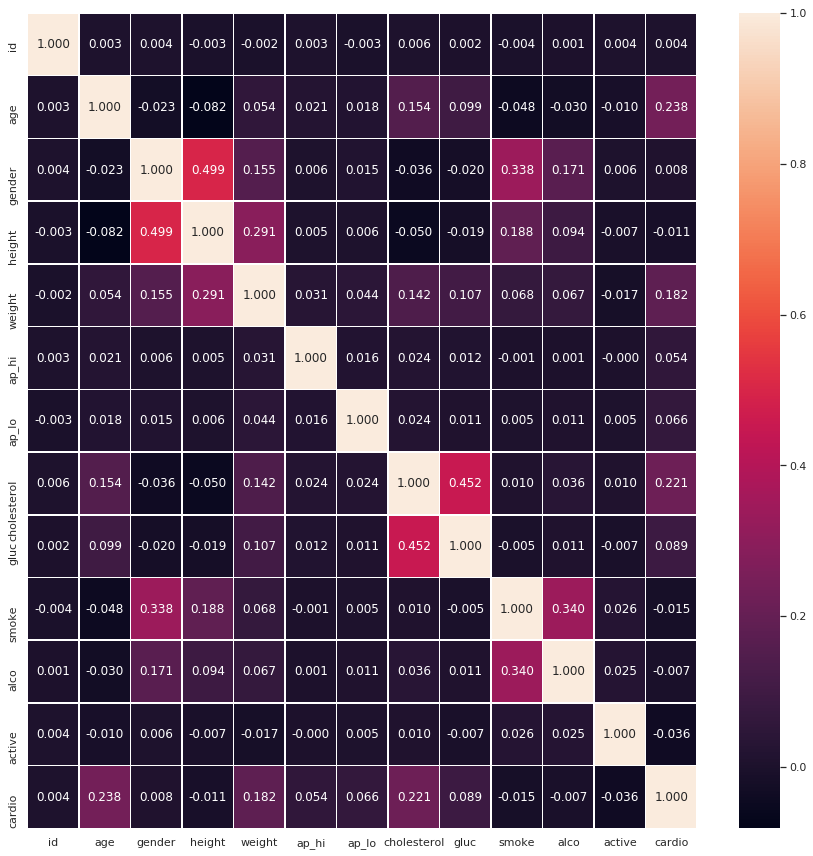

In [8]:
corr = df_data_1.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [9]:
df_data_1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


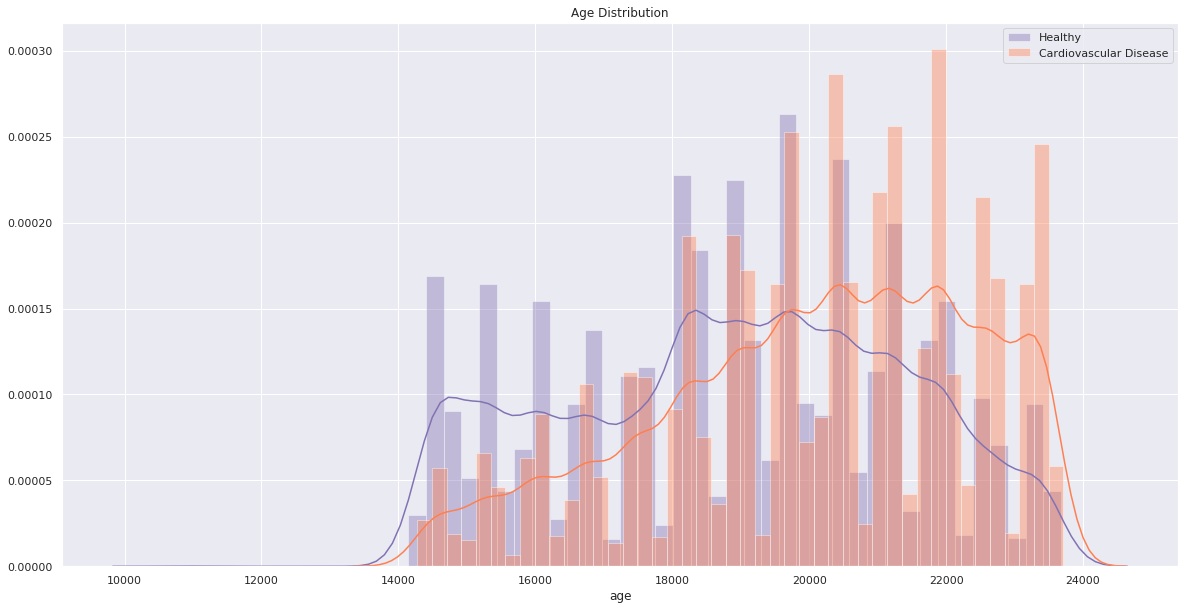

In [16]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,10))
sns.distplot(df_data_1['age'][df_data_1['cardio']==0], ax = ax1, color='m')
sns.distplot(df_data_1['age'][df_data_1['cardio']==1], ax = ax1,color='coral')
ax1.set_title('Age Distribution')
ax1.legend(['Healthy', 'Cardiovascular Disease'])

### Data Processing

#### Spark Session Initialization

In [5]:
sqlContext = SQLContext(sc)

In [6]:
ColestrolDF = sqlContext.createDataFrame(df_data_1)
# we can cache an Dataframe to avoid computing it from the beginning everytime it is accessed.
ColestrolDF.cache()
ColestrolDF.show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|  71.0|  110|   70

#### Feature Engineering

In [7]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml import Pipeline

In [8]:
encoder1 = OneHotEncoder(inputCol="gender", outputCol="gender_processed")
encoder2 = OneHotEncoder(inputCol="cholesterol", outputCol="cholesterol_processed")
encoder3 = OneHotEncoder(inputCol="gluc", outputCol="gluc_processed")
vectorAssembler1 = VectorAssembler(inputCols=["age", "height", "weight", "ap_hi", "ap_lo"], outputCol="continuous_features")
normalizer = MinMaxScaler(inputCol="continuous_features", outputCol="continuous_features_norm")
vectorAssembler2 = VectorAssembler(inputCols=["continuous_features_norm", "gender_processed", "cholesterol_processed", "gluc_processed", "smoke", "alco", "active"], outputCol="features")

In [9]:
pipeline = Pipeline(stages=[encoder1, encoder2, encoder3, vectorAssembler1, normalizer, vectorAssembler2])
#pipeline = Pipeline(stages=[vectorAssembler1, normalizer, vectorAssembler2])
model = pipeline.fit(ColestrolDF)
processed_data = model.transform(ColestrolDF)

In [10]:
processed_data.show(5)

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+----------------+---------------------+--------------+--------------------+------------------------+--------------------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|gender_processed|cholesterol_processed|gluc_processed| continuous_features|continuous_features_norm|            features|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+----------------+---------------------+--------------+--------------------+------------------------+--------------------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|       (2,[],[])|        (3,[1],[1.0])| (3,[1],[1.0])|[18393.0,168.0,62...|    [0.58807588075880...|(16,[0,1,2,3,4,8,...|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|   (2,[1],[1.0])|            (3,[],[])| (3,[1],[1.0])|[20228.0,156.0,85...|    [0.

In [11]:
splits = processed_data.randomSplit([0.8, 0.2])
df_train = splits[0]
df_test = splits[1]

### Classification

In [12]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="cardio", featuresCol="features", maxIter=10)
model = gbt.fit(df_train)
predictions = model.transform(df_test)

In [13]:
predictions.show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+----------------+---------------------+--------------+--------------------+------------------------+--------------------+--------------------+--------------------+----------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|gender_processed|cholesterol_processed|gluc_processed| continuous_features|continuous_features_norm|            features|       rawPrediction|         probability|prediction|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+----------------+---------------------+--------------+--------------------+------------------------+--------------------+--------------------+--------------------+----------+
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|   (2,[1],[1.0])|            (3,[],[])| (3,[1],[1.0])|[20228.0,156.0,85...|    [0.73015873015873...|(16,[0,1,2,3,4,6,...|[-0.763061

In [14]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("cardio")
binEval.evaluate(predictions)

0.7301048066498013

In [15]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(labelCol="cardio", featuresCol="features", smoothing=1.0, modelType="multinomial")
model_nb = nb.fit(df_train)
predictions_nb = model_nb.transform(df_test)
binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("cardio")
binEval.evaluate(predictions_nb)

0.5890133718829057

In [16]:
from pyspark.ml.classification import LogisticRegression
log = LogisticRegression(labelCol="cardio", featuresCol="features",maxIter=10, tol=1E-6, fitIntercept=True)
model_log = log.fit(df_train)
predictions_log = model_log.transform(df_test)
binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("cardio")
binEval.evaluate(predictions_log)

0.6575352367184677

### Applying Deep Learning

In [17]:
!pip install --upgrade git+https://github.com/JoeriHermans/dist-keras.git

  Cloning https://github.com/JoeriHermans/dist-keras.git to /home/dsxuser/.tmp/pip-req-build-_jbzrx4o
  Running command git clone -q https://github.com/JoeriHermans/dist-keras.git /home/dsxuser/.tmp/pip-req-build-_jbzrx4o
     |████████████████████████████████| 2.8MB 11.1MB/s eta 0:00:01
     |████████████████████████████████| 3.2MB 42.7MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.tmp/pip-ephem-wheel-cache-uosdbasp/wheels/51/e0/c9/a7426902fcc52970d4d57d509b4bfa4f03a737d90787cff8ad
  Stored in directory: /home/dsxuser/.cache/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built dist-keras theano


In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [19]:
normalizer1 = MinMaxScaler()
normalizer1.fit(np.array(df_data_1["age"]).reshape(-1, 1))
df_data_1["age"] = normalizer1.transform(np.array(df_data_1["age"]).reshape(-1, 1))
normalizer2 = MinMaxScaler()
normalizer2.fit(np.array(df_data_1["height"]).reshape(-1, 1))
df_data_1["height"] = normalizer2.transform(np.array(df_data_1["height"]).reshape(-1, 1))
normalizer3 = MinMaxScaler()
normalizer3.fit(np.array(df_data_1["weight"]).reshape(-1, 1))
df_data_1["weight"] = normalizer3.transform(np.array(df_data_1["weight"]).reshape(-1, 1))
normalizer4 = MinMaxScaler()
normalizer4.fit(np.array(df_data_1["ap_hi"]).reshape(-1, 1))
df_data_1["ap_hi"] = normalizer4.transform(np.array(df_data_1["ap_hi"]).reshape(-1, 1))
normalizer5 = MinMaxScaler()
normalizer5.fit(np.array(df_data_1["ap_lo"]).reshape(-1, 1))
df_data_1["ap_lo"] = normalizer5.transform(np.array(df_data_1["ap_lo"]).reshape(-1, 1))

In [20]:
df_data_1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.999925,2,0.009133,0.003371,0.005980,0.004349,1,1,0,0,1,0
1,1,0.999928,1,0.007712,0.004202,0.006921,0.004449,3,1,0,0,1,1
2,2,0.999925,1,0.008749,0.003394,0.006893,0.003712,3,1,0,0,0,1
3,3,0.999891,2,0.009589,0.004653,0.008511,0.005674,1,1,0,0,1,1
4,4,0.999933,1,0.008927,0.003205,0.005722,0.003433,1,1,0,0,0,0


In [23]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(100, input_dim=11))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(250, input_dim=11))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(350, input_dim=11))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(200, input_dim=11))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics = ['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1200      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               25250     
_________________________________________________________________
activation_5 (Activation)    (None, 250)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 350)               87850     
__________

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data_1[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']], df_data_1['cardio'], test_size=0.20, random_state=42)

In [42]:
# import numpy as np
# X_train = np.reshape(X_train, (56000 , 15))
# X_test = np.reshape(X_test, (14000, 15))

In [43]:
history = model.fit(X_train, y_train, batch_size = 100, epochs = 10, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)

Instructions for updating:
Use tf.cast instead.
Train on 56000 samples, validate on 14000 samples
Epoch 1/10
56000/56000 [==============================] - 670s 12ms/step - loss: 0.6864 - acc: 0.5342 - val_loss: 0.6756 - val_acc: 0.5896
Epoch 2/10
56000/56000 [==============================] - 692s 12ms/step - loss: 0.6770 - acc: 0.5642 - val_loss: 0.6693 - val_acc: 0.5909
Epoch 3/10
56000/56000 [==============================] - 709s 13ms/step - loss: 0.6728 - acc: 0.5751 - val_loss: 0.6677 - val_acc: 0.5902
Epoch 4/10
56000/56000 [==============================] - 669s 12ms/step - loss: 0.6714 - acc: 0.5795 - val_loss: 0.6664 - val_acc: 0.5908
Epoch 5/10
56000/56000 [==============================] - 676s 12ms/step - loss: 0.6711 - acc: 0.5805 - val_loss: 0.6661 - val_acc: 0.5908
Epoch 6/10
56000/56000 [==============================] - 695s 12ms/step - loss: 0.6710 - acc: 0.5816 - val_loss: 0.6664 - val_acc: 0.5899
Epoch 7/10
56000/56000 [==============================] - 697s 12ms/

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()